In [168]:
import pandas as pd, numpy as np, csv
filename = 'soc-sign-bitcoinotc.csv'
file = open(filename, "r")
reader = csv.reader(file)

data = {}
source = []
target = []
count = 0
for row in reader:
    if((int(row[0]) in data) and (int(row[2])>=8)):
        data[int(row[0])].append(int(row[1]))
        source.append(int(row[0]))
        target.append(int(row[1]))
    elif(int(row[2]) >= 8):
        data[int(row[0])] = [int(row[1])]
        source.append(int(row[0]))
        target.append(int(row[1]))
dataDictionary = {'source': source, 'target': target}
dataFrame = pd.DataFrame(data=dataDictionary)
dataFrame.to_csv('connections.csv', index = False)

## Create connection matrix (Matrix A)

In [169]:
matrixA = np.zeros((5999,5999))
for i in sorted(data):
    size = len(list(map(int, data[i])))
    for j in data[i]:
        matrixA.itemset((int(j)-1, int(i)-1), 1.0/size)

## Create matrix B

In [170]:
matrixB = np.empty((5999,5999))
result = 0.15/5999
matrixB.fill(result)

## Create matrix V

In [171]:
matrixV = 1.0/5999 * np.ones((5999, 1))

## Calculate M

In [172]:
m = (0.85 * matrixA) + matrixB

## Calculate pageRank

In [173]:
count = 0
def pageRank(matrixV):
    global count
    if((sum(abs((m.dot(matrixV))-matrixV))) > 0.001):
        count +=1
        print(count)
        print(m.dot(matrixV))
        print(sum(abs((m.dot(matrixV))-matrixV)))
        return pageRank(m.dot(matrixV))
    else:
        count+=1
        print(count)
        print(m.dot(matrixV))
        print(sum(abs((m.dot(matrixV))-matrixV)))
        return m.dot(matrixV)

## Run PageRank and create file .csv

In [174]:
result = pageRank(matrixV)
print(result)
pr = []
for i in result:
    pr.append(i[0])
target = np.arange(1,6000)
dataDict = {'target': target, 'pageRank': pr}
df = pd.DataFrame(data=dataDict)
df.to_csv('pageRank.csv', index = False)

1
[[3.11475193e-03]
 [1.91382907e-04]
 [4.07475320e-05]
 ...
 [2.50041674e-05]
 [2.50041674e-05]
 [2.50041674e-05]]
[0.82220211]
2
[[1.88308561e-03]
 [4.36489740e-04]
 [2.42418995e-05]
 ...
 [6.16684711e-06]
 [6.16684711e-06]
 [6.16684711e-06]]
[0.16297095]
3
[[2.00943324e-03]
 [3.03026236e-04]
 [4.38778754e-05]
 ...
 [2.65384435e-06]
 [2.65384435e-06]
 [2.65384435e-06]]
[0.04766859]
4
[[1.11027699e-03]
 [3.06305847e-04]
 [3.02864428e-05]
 ...
 [1.66729826e-06]
 [1.66729826e-06]
 [1.66729826e-06]]
[0.02186701]
5
[[1.02307638e-03]
 [1.94087785e-04]
 [3.01381198e-05]
 ...
 [1.20923420e-06]
 [1.20923420e-06]
 [1.20923420e-06]]
[0.01364358]
6
[[6.13562821e-04]
 [1.70003354e-04]
 [1.92509091e-05]
 ...
 [9.20396127e-07]
 [9.20396127e-07]
 [9.20396127e-07]]
[0.00945671]
7
[[5.47168599e-04]
 [1.11274609e-04]
 [1.67707065e-05]
 ...
 [7.14834175e-07]
 [7.14834175e-07]
 [7.14834175e-07]]
[0.00691455]
8
[[3.44350860e-04]
 [9.36069858e-05]
 [1.10716228e-05]
 ...
 [5.62354248e-07]
 [5.62354248e-07]


## Print top5 PageRank

In [176]:
#print indices de maior pagerank
print(list(result).index(sorted(result, reverse=True)[0]) + 1)
print(list(result).index(sorted(result, reverse=True)[1]) + 1)
print(list(result).index(sorted(result, reverse=True)[2]) + 1)
print(list(result).index(sorted(result, reverse=True)[3]) + 1)
print(list(result).index(sorted(result, reverse=True)[4]) + 1)

202
144
3996
361
1


## Quantas iterações o PageRank precisou rodar até atingir convergência?

15 iterações

## Quais os 5 investidores mais importantes segundo o PageRank? Quais seus valores de PageRank?

O top 5 foram os IDs 202, 144, 3996, 361, 1, com os valores de PageRank 9.245618995053199e-05, 7.937100583753756e-05, 6.976101782184877e-05, 6.013472791713227e-05, 5.202066816598557e-05 respectivamente

## Como você poderia usar o PageRank caso você fosse um investidor em bitcoins?

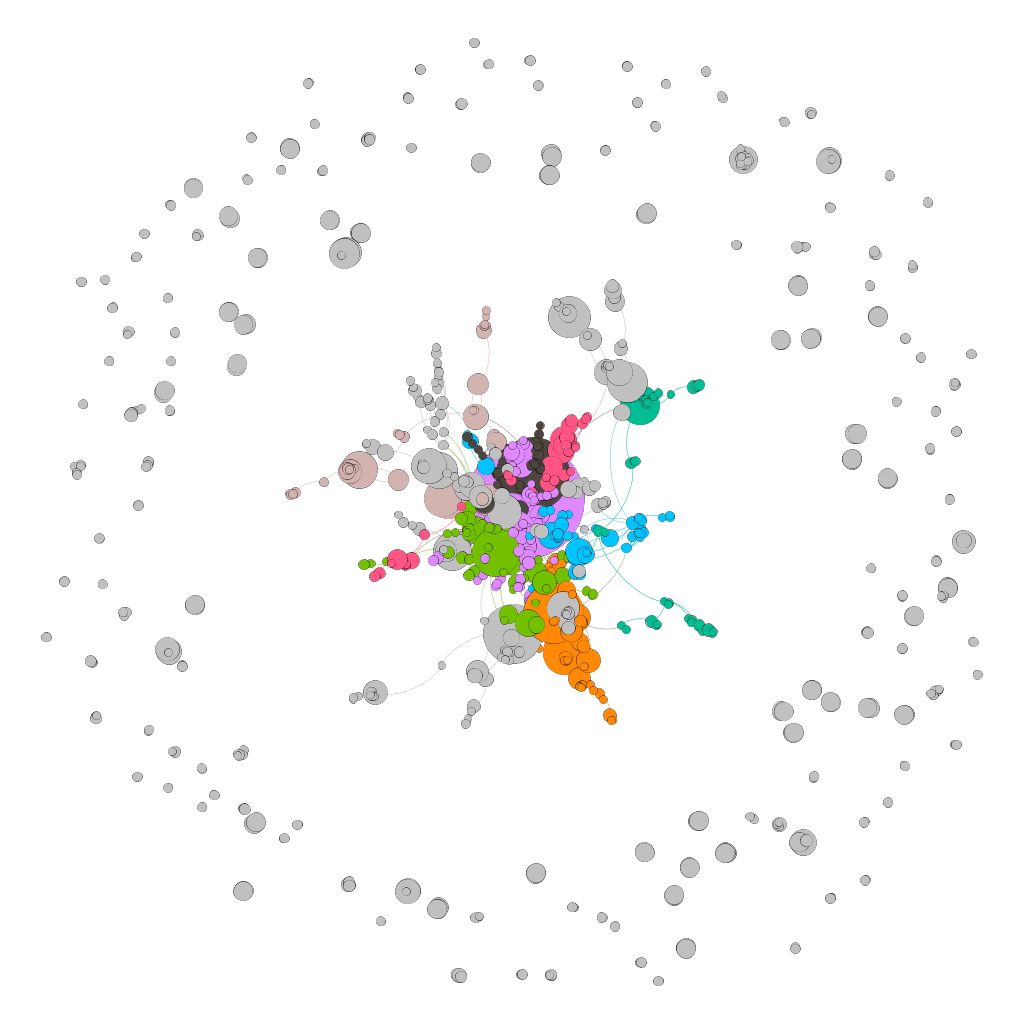

In [179]:
from IPython.display import Image
Image(filename="gephi.png")